<a href="https://colab.research.google.com/github/saivishwanathgoud/Regression/blob/master/Regression(Scikit_Learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Analyze diamonds by their cut, color, clarity, price, and other attributes**

Refer to [Dataset](https://https://www.kaggle.com/shivam2503/diamonds) for data description and features explanation



In [3]:
#loading the dataset into pandas dataframe 
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [0]:
#dropping the unnamed column 
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [5]:
#getting sense of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    35489 non-null  float64
 1   cut      35489 non-null  object 
 2   color    35489 non-null  object 
 3   clarity  35489 non-null  object 
 4   depth    35489 non-null  float64
 5   table    35489 non-null  float64
 6   price    35488 non-null  float64
 7   x        35488 non-null  float64
 8   y        35488 non-null  float64
 9   z        35488 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [6]:
#descriptive statistics 
df.describe()

,carat,depth,table,price,x,y,z
count,35489.000000,35489.000000,35489.000000,35488.000000,35488.000000,35488.000000,35488.000000
mean,0.944805,61.773240,57.574054,5181.583408,6.059509,6.062166,3.741514
std,0.516056,1.439049,2.231376,4407.694298,1.208776,1.230507,0.748039
min,0.200000,43.000000,5.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,833.000000,4.690000,4.710000,2.900000
50%,1.000000,61.900000,57.000000,4332.000000,6.360000,6.360000,3.940000
75%,1.210000,62.600000,59.000000,7220.000000,6.840000,6.840000,4.220000
max,5.010000,71.800000,95.000000,18823.000000,10.740000,58.900000,8.060000


From the above table, we can see min value has 0 for x, y and z but according to the data description it is not possible as they are lenght, width and depth 

In [8]:
#looking for rows with 0 value for anyone of the x, y,z values 
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142.0,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167.0,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696.0,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837.0,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731.0,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139.0,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564.0,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0


In [9]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

17

Replacing all the 0 values with np.nan as depth column doesn't contain any 0 values, but depth is calculated using x,y and z parameters.

In [0]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

In [11]:
# Just to Confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
#checking for null values 
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       1
x           7
y           6
z          18
dtype: int64

In [0]:
#droppig the missing values 
df.dropna(inplace = True)

In [16]:
df.shape

(35471, 10)

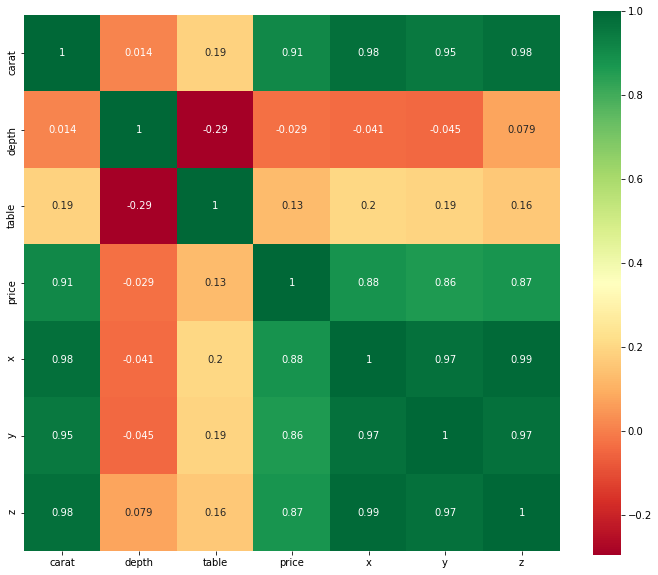

In [17]:
#univariate and bivarite analysis of data 
plt.figure(figsize = (12,10))
ax = sns.heatmap(df.corr(), annot= True, square= True, cmap = 'RdYlGn')



1.   We see x,y, z has a strong relationship with price, but depth which comes from these 3 parameters has no significant relationship with price
2.   Carat has significant relationship with price. 



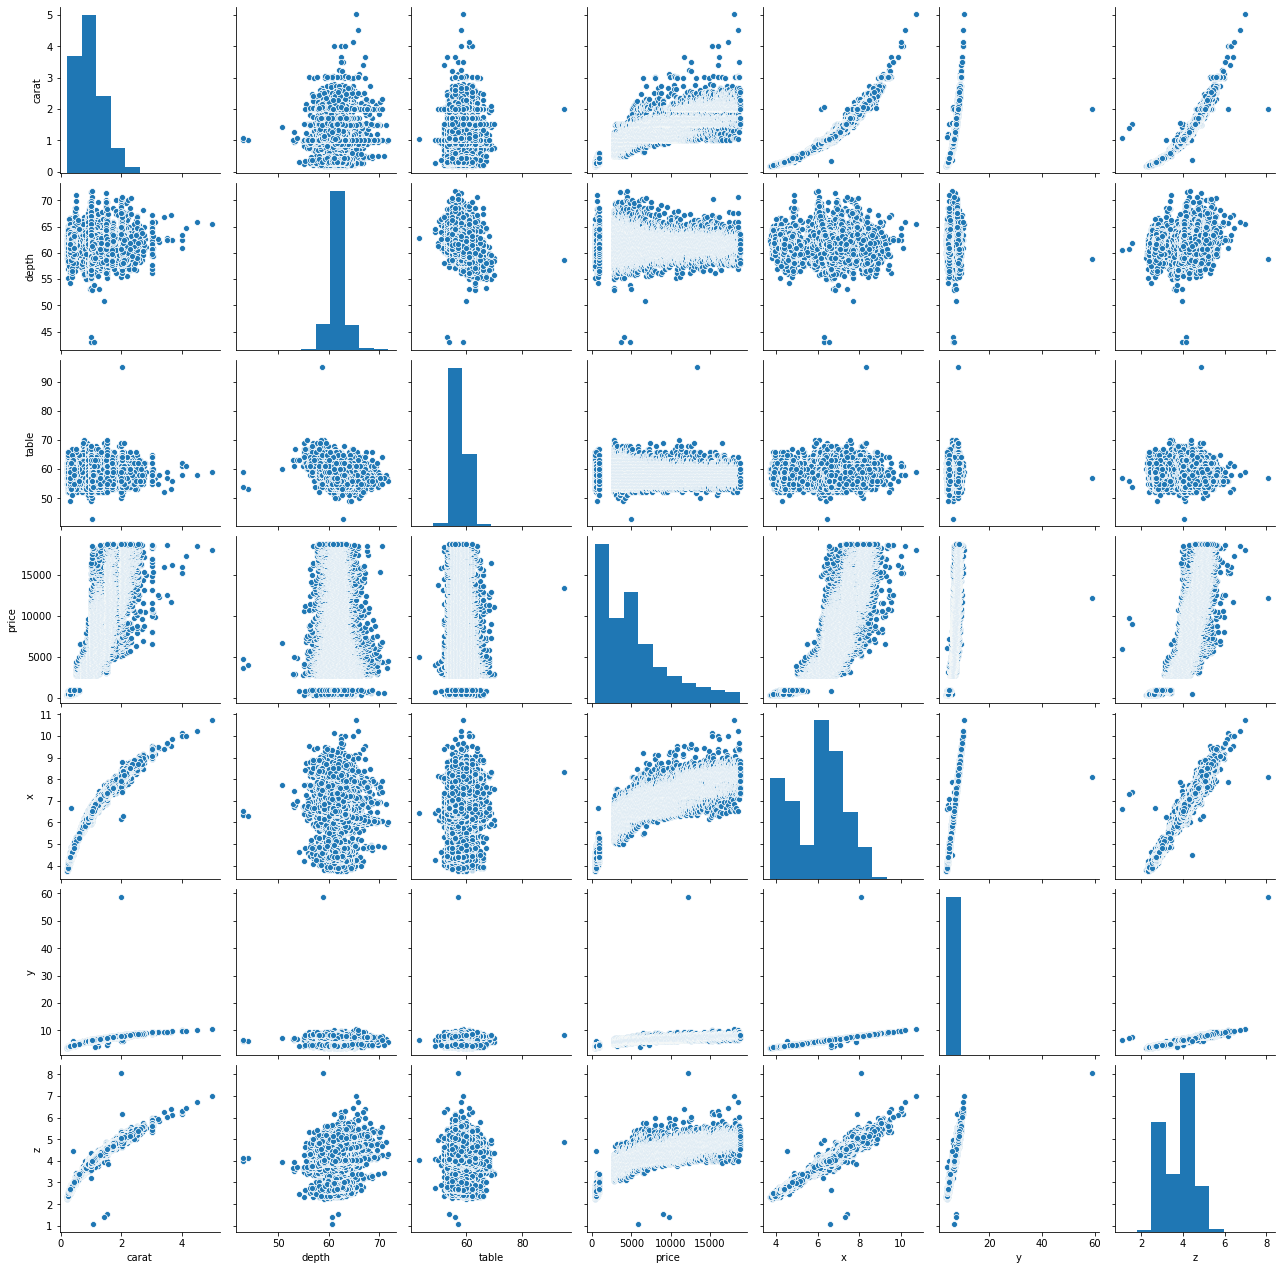

In [18]:
ax = sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


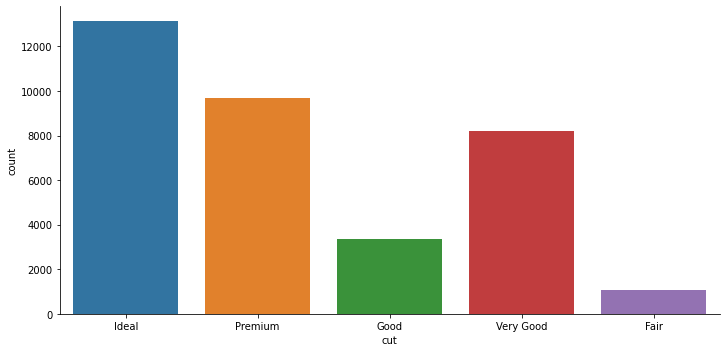

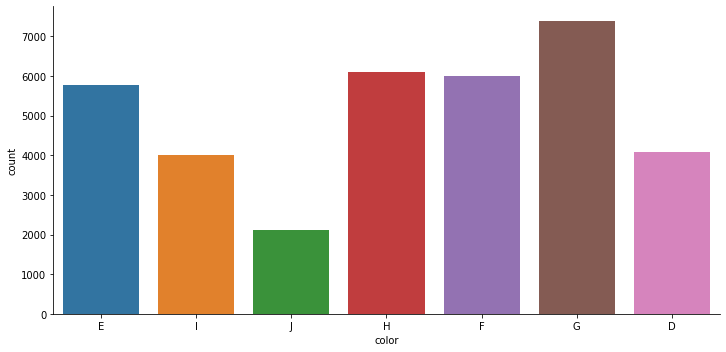

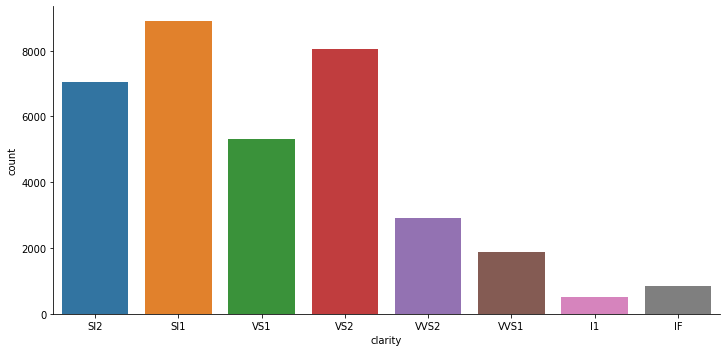

In [30]:
#looking at categorical data 
ax = sns.factorplot(x = 'cut', data = df, kind = 'count', aspect = 2.0)
ax = sns.factorplot(x = 'color', data = df, kind = 'count', aspect = 2.0)
ax = sns.factorplot(x = 'clarity', data = df, kind = 'count', aspect = 2.0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


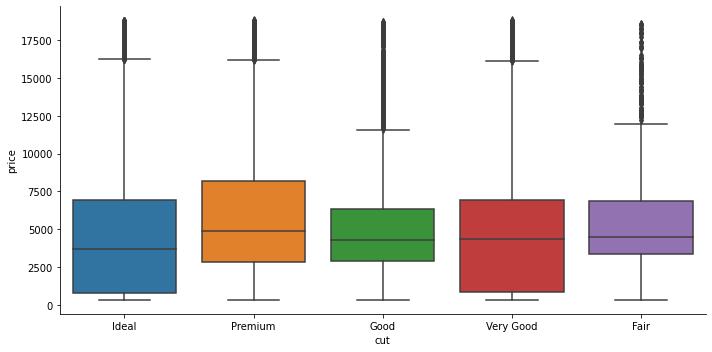

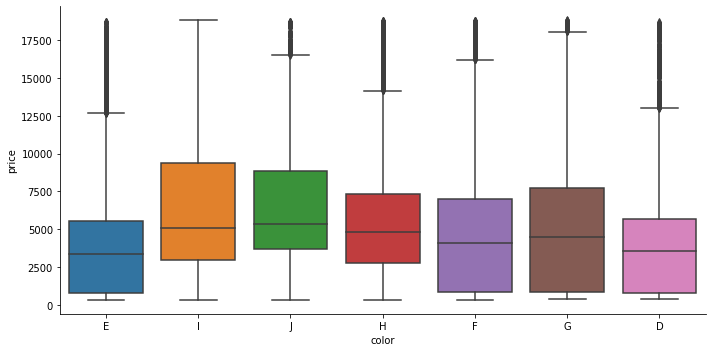

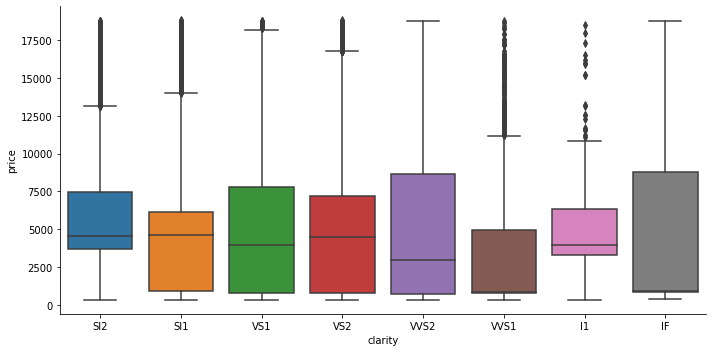

In [31]:
ax = sns.factorplot(x= 'cut', y = 'price', data = df, kind = 'box', aspect = 2.0)
ax = sns.factorplot(x= 'color', y = 'price', data = df, kind = 'box', aspect = 2.0)
ax = sns.factorplot(x= 'clarity', y = 'price', data = df, kind = 'box', aspect = 2.0)

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive

from the above charts, we can see Color, Clarity and Cut doesn't have significant influence on price. 

In [32]:
#treating categorical columns with one-hot encoding 
one_hot_encoders_df= pd.get_dummies(df)
one_hot_encoders_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [33]:
# a structured approach
cols = one_hot_encoders_df.columns
df_clean_data = pd.DataFrame(one_hot_encoders_df,columns= cols)
df_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [0]:
#Data scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df_clean_data[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=df_clean_data.index)

In [35]:
numericals.head()

,carat,depth,x,y,z,table
0,-1.385153,-0.190150,-1.749511,-1.695455,-1.765890,-1.163581
1,-1.423924,-1.371816,-1.799258,-1.809431,-1.927243,1.547415
2,-1.385153,-3.387599,-1.666599,-1.622185,-1.927243,3.354745
3,-1.268839,0.435438,-1.542231,-1.491926,-1.496967,0.191917
4,-1.230068,1.061026,-1.426154,-1.394233,-1.335614,0.191917


In [37]:
df_final = df_clean_data.copy(deep=True)
df_final[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]
df_final.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.385153,-0.190150,-1.163581,326.0,-1.749511,-1.695455,-1.765890,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.423924,-1.371816,1.547415,326.0,-1.799258,-1.809431,-1.927243,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.385153,-3.387599,3.354745,327.0,-1.666599,-1.622185,-1.927243,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.268839,0.435438,0.191917,334.0,-1.542231,-1.491926,-1.496967,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,-1.230068,1.061026,0.191917,335.0,-1.426154,-1.394233,-1.335614,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [0]:

x = df_final.drop(["price"],axis=1)
y = df_final.price

In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [40]:
#Model training
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 86.95056161761518%
Mean absolute error: 873.6828755380936
Mean squared error: 2558517.6911227326
R Squared: 0.8695056161761519
Adjusted R Squared: 0.8691983102609676
